In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

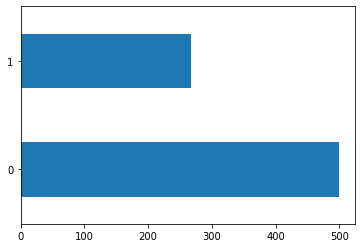

In [13]:
df['Outcome'].value_counts().plot.barh();

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
y = df['Outcome']
X = df.drop(['Outcome'],axis = 1)

In [22]:
#Stats Models (gereksiz)

In [19]:
loj = sm.Logit(y, X)
loj_model = loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [21]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                 0.05922
Time:                        15:32:04   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [24]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(solver='liblinear')

In [26]:
loj_model.intercept_#sabit değer

array([-5.88581574])

In [27]:
loj_model.coef_#bütün değerlerin katsayısı

array([[ 1.17109287e-01,  2.83637114e-02, -1.69030150e-02,
         7.35724571e-04, -6.42784045e-04,  5.96466920e-02,
         6.85700638e-01,  7.19299389e-03]])

In [29]:
#TAHMİN ve TUNING

In [30]:
y_pred = loj_model.predict(X)

In [31]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [32]:
accuracy_score(y, y_pred)

0.7760416666666666

In [35]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [42]:
loj_model.predict(X)[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [39]:
loj_model.predict_proba(X)[0:5]

array([[0.35043779, 0.64956221],
       [0.91696356, 0.08303644],
       [0.22433864, 0.77566136],
       [0.92141996, 0.07858004],
       [0.16538713, 0.83461287]])

In [ ]:
#Kendi Eşik Değerimizi Belirliyoruz

In [43]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [70]:
y_pred = [1 if i > 0.50 else 0 for i in y_probs]

In [71]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [72]:
accuracy_score(y, y_pred)

0.7760416666666666

In [73]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



Text(0.5, 1.0, 'ROC')

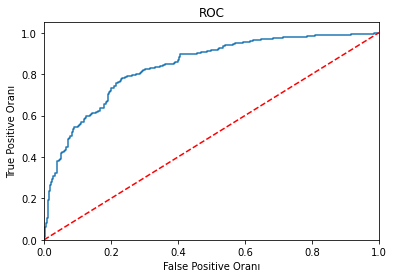

In [77]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X)) 
fpr, tpr, thresholds = roc_curve (y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr,tpr, label = 'AUC (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 44)

In [79]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [80]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7864583333333334

In [84]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.8       , 0.8       , 0.78947368, 0.84210526, 0.73684211,
       0.78947368, 0.84210526, 0.78947368, 0.57894737, 0.84210526])

In [83]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()#en doğru sonuç değeri

0.7810526315789473